# Модуль 3. Мультимодальные и мультизадачные модели. Часть 1
##Семинар 6. Рассмотрение модели CLIP

##Цель занятия
Рассмотреть модель CLIP, одну из основных моделей text-imаge, которая позволяет соотносить текст с картинками, а также использовать для ее классификации

Языковые модели (LM) не могут полагаться только на язык. Именно эта идея лежит в основе статьи [Experience Grounds Language](https://arxiv.org/abs/2004.10151), в которой предлагается структура для измерения текущего и будущего прогресса LM. Ключевая идея заключается в том, что после определенного порога LM необходимы другие формы данных, такие как визуальный ввод.

## Мультимодальность

Мультимодальный характер CLIP основан на двух моделях энкодеров, обученных «говорить на одном языке». Текстовые входные данные передаются в текстовый энкодер, а входные изображения в [энкодер изображений](https://arxiv.org/abs/2103.00020). Эти модели затем создают векторное представление соответствующего ввода.

Обе модели «говорят на одном языке», кодируя схожие понятия в тексте и изображениях в схожие векторы. Это означает, что текст «две собаки, бегущие по морозному полю» выведет вектор, аналогичный изображению двух собак, бегущих по морозному полю.

![](https://cdn.sanity.io/images/vr8gru94/production/a54a2f1fa0aeac03748c09df0fdfbb42aadc96b7-2430x1278.png)

Мы можем думать о языке, на котором говорят эти модели, как о векторном пространстве, в котором они кодируют векторы. Эти две модели могут выражать тонкую информацию о тексте и изображениях через это векторное пространство. Однако этот «векторный язык» слишком абстрактен, чтобы мы могли его понять напрямую.

Вместо того, чтобы напрямую читать этот «язык», мы можем обучить другие простые нейронные сети понимать его и делать прогнозы, которые мы можем понять. Или мы используем векторный поиск для выявления схожих концепций и шаблонов в текстовых доменах и доменах изображений.

Давайте посмотрим на пример CLIP в действии.

## Поиск изображения по тексту

Ввод промпта в строку поиска позволяет нам искать изображения на основе их содержания, а не любых прикрепленных текстовых метаданных. Мы называем это поиском изображений на основе контента (CBIR).

С помощью CBIR мы можем искать конкретные фразы, например «две собаки бегут по морозному полю». Мы можем даже отказаться от слова «собаки» и заменить его повседневным сленгом для собак, например «хороший мальчик» или «лучший друг человека», и мы получим те же изображения, показывающие собак, бегущих по полю.

CLIP может точно понимать язык. Он понимает, что в контексте бега по полю мы, скорее всего, имеем в виду собак, а не буквально имеем в виду хороших детей или чьих-то «человеческих» лучших друзей.

Забавно, что набор данных не содержит изображений хот-догов (кроме одного). Итак, предположим, мы ищем "hot dog". В этом случае мы сначала получаем изображение, содержащее хот-дог (и собаку), собаку, выглядящую поджаренной в теплой комнате, другую собаку, выглядящую теплой в шерстяной одежде, и еще одну собаку, позирующую перед камерой. Все они в том или ином смысле изображают "hot dog".

> После обработки энкодером текста или изображений CLIP у нас остаются векторы. Это означает, что мы можем осуществлять поиск по любой модальности с любой модальностью; мы можем искать в любом направлении. Мы также можем придерживаться одной модальности, например, «текст-текст» или «изображение-изображение».

Теперь, когда мы увидели, на что способен CLIP, давайте посмотрим, как он это может сделать.

## CLIP

CLIP фактически состоит из двух моделей, обучающихся параллельно. 12-слойный трансформер текста для эмбеддингов текста и трансформер ResNet или Vision Transformer (ViT) для эмбеддингов изображений.

![](https://cdn.sanity.io/images/vr8gru94/production/539716ea1571e459908c1fdc5a898fea239d8243-2803x1672.png)

Энкодер текста и изображения (ResNet или ViT) выводят одновекторные представления для каждой записи текста/изображения, подаваемой в энкодеры. Все векторы имеют размерность 512 и могут быть представлены в одном и том же векторном пространстве. Это означает, что похожие изображения и текст создают векторы, которые появляются рядом друг с другом.

## Контрастное предобучение

Как в области обработки естественного языка (NLP), так и в компьютерном зрении (CV) в SotA доминируют большие предобученные модели. Идея состоит в том, что, предоставив большой модели много данных, они могут изучить общие закономерности из набора данных.

Для языковых моделей это могут быть общие правила и закономерности английского или русского языка. Для моделей CV это могут быть характеристики различных сцен или объектов.

Проблема мультимодальности в том, что эти модели обучаются отдельно и по умолчанию не понимают друг друга. CLIP решает эту проблему благодаря контрастному предобучению изображения и текста. С помощью CLIP энкодеры текста и изображений обучаются с учетом других модальностей и контекста. Это означает, что энкодеры текста и изображений разделяют «косвенное понимание» шаблонов в обеих модальностях; язык и зрение.

Контрастное предобучение работает, беря пару (текст, изображение) – где текст описывает изображение – и обучаясь максимально точному энкодингу пар в векторном пространстве.

Чтобы это работало хорошо, нам также нужны отрицательные пары, чтобы обеспечить контрастное сравнение. Нам нужны положительные пары, которые должны выводить похожие векторы, и отрицательные пары, которые должны выводить разные векторы.

Это общая идея контрастного обучения, которую можно найти в обучающих функциях многих моделей, особенно тех, которые создают эмбеддинги.

Отрицательные пары можно извлечь непосредственно из положительных пар. Если у нас положительные пары \\((T_1,I_1)\\) и \\((T_2,I_2)\\), мы просто меняем местами компоненты, получая отрицательные пары \\((T_1,I_2)\\) и \\((T_2,I_1)\\).

Благодаря этому мы можем применить функцию потерь, которая максимизирует сходство между \\((T_1,I_1)\\) и \\((T_2,I_2)\\) и минимизирует сходство между \\((T_1,I_2)\\) и \\((T_2,I_1)\\). Все вместе это выглядит так:

![](https://cdn.sanity.io/images/vr8gru94/production/d6868e6dae721512fed8f1287fc9ffe6b6a2cddd-2332x1342.png)

На этом изображении мы можем видеть один этап предобучения в одном батче. Функция потерь предполагает, что пары по диагонали должны иметь максимальное значение скалярного произведения, а все остальные пары - минимальное значение скалярного произведения. Для этого оптимизированы модели энкодеры текста и изображений.

Фундаментальное предположение состоит в том, что в одном батче нет других положительных пар. Например, мы предполагаем, что «две собаки, бегущие по морозному полю» релевантны только изображению, с которым они сочетаются. Мы предполагаем, что других текстов или изображений с аналогичным значением нет.

Такое предположение возможно, поскольку наборы данных, используемые для предварительного обучения, разнообразны и достаточно велики, поэтому вероятность появления двух похожих пар в одном батче незначительна. Поэтому достаточно редко, чтобы практически не оказывать негативного влияния на перфоманс предобучения.

# Часть I. Простая реализация OpenAI CLIP

## Введение

В январе 2021 года **OpenAI** анонсировала две новые модели: **DALL-E** и **CLIP**, обе **мультимодальные** модели, некоторым образом соединяющие **тексты и изображения**. На этой части семинара мы собираемся реализовать модель CLIP с нуля в **PyTorch**.

### Что делает CLIP?

В [Learning Transferable Visual Models From Natural Language Supervision](https://arxiv.org/abs/2103.00020) OpenAI представляет свою новую модель, которая называется **CLIP**, для **контрастного предобучения язык-изображение**. Короче говоря, эта модель изучает связь между целым предложением и изображением, которое оно описывает; в том смысле, что когда модель обучена, по входному предложению она сможет извлечь наиболее связанные изображения, соответствующие этому предложению. Здесь важно то, что она обучается на полных предложениях, а не на отдельных классах, таких как машина, собака и т. д. Интуиция заключается в том, что при обучении на целых предложениях модель может выучить гораздо больше вещей и найти некую закономерность между изображениями и текстами.
Авторы также показывают, что когда эта модель обучается на огромном наборе данных изображений и соответствующих им текстов, она также может действовать как классификатор. Рекомендуется изучить эту статью, чтобы узнать больше об этой захватывающей модели и ее удивительных результатах при сравнительном анализе наборов данных. Упомянем лишь одно: модель CLIP, обученная с помощью этой стратегии, классифицирует ImageNet лучше, чем модели SOTA, обученные на самой ImageNet, оптимизированные для единственной задачи классификации.

В качестве **спойлера** (!) давайте посмотрим, на что способна окончательная модель, которую мы построим с нуля: учитывая запрос (необработанный текст), например «мальчик прыгает на скейтборде» или «девочка прыгает с качелей», модель получит наиболее релевантные изображения:

![](https://i.ibb.co/9gdYqNP/teaser-cropped.png)

In [ ]:
!pip install timm
!pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 32.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 33.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 77.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 17.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 42.1 MB/s eta 0:00:00


In [ ]:
import os
import cv2
import gc
import numpy as np
import pandas as pd
import itertools
from tqdm.autonotebook import tqdm
import albumentations as A
import matplotlib.pyplot as plt

import torch
from torch import nn
import torch.nn.functional as F
import timm
from transformers import DistilBertModel, DistilBertConfig, DistilBertTokenizer

<ipython-input-2-2540d8c9d86b>:7: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


Для того, чтобы скачать датасет, нужно зарегаться на сайте [kaggle.com](https://www.kaggle.com/) или по уже существующему аккаунту получить API key.

In [ ]:
# !pip install kaggle --upgrade
import json

with open('kaggle.json', 'r') as f:
  data = json.load(f)
  os.environ['KAGGLE_USERNAME'] = data["username"]
  os.environ['KAGGLE_KEY'] = data["key"]

### For Flickr 8k
!kaggle datasets download -d adityajn105/flickr8k
!unzip flickr8k.zip
dataset = "8k"


### For Flickr 30k
# !kaggle datasets download -d hsankesara/flickr-image-dataset
# !unzip flickr-image-dataset.zip
# dataset = "30k"

Выходные данные были обрезаны до нескольких последних строк (5000).
  inflating: Images/2844846111_8c1cbfc75d.jpg  
  inflating: Images/2844963839_ff09cdb81f.jpg  
  inflating: Images/2845246160_d0d1bbd6f0.jpg  
  inflating: Images/2845691057_d4ab89d889.jpg  
  inflating: Images/2845845721_d0bc113ff7.jpg  
  inflating: Images/2846037553_1a1de50709.jpg  
  inflating: Images/2846785268_904c5fcf9f.jpg  
  inflating: Images/2846843520_b0e6211478.jpg  
  inflating: Images/2847514745_9a35493023.jpg  
  inflating: Images/2847615962_c330bded6e.jpg  
  inflating: Images/2847859796_4d9cb0d31f.jpg  
  inflating: Images/2848266893_9693c66275.jpg  
  inflating: Images/2848571082_26454cb981.jpg  
  inflating: Images/2848895544_6d06210e9d.jpg  
  inflating: Images/2848977044_446a31d86e.jpg  
  inflating: Images/2849194983_2968c72832.jpg  
  inflating: Images/2850719435_221f15e951.jpg  
  inflating: Images/2851198725_37b6027625.jpg  
  inflating: Images/2851304910_b5721199bc.jpg  
  inflating: Images/

## Предварительная обработка

In [ ]:
if dataset == "8k":
  df = pd.read_csv("captions.txt")
  df['id'] = [id_ for id_ in range(df.shape[0] // 5) for _ in range(5)]
  df.to_csv("captions.csv", index=False)
  df = pd.read_csv("captions.csv")
  image_path = "/content/Images"
  captions_path = "/content"
elif dataset == "30k":
  df = pd.read_csv("/content/flickr30k_images/results.csv", delimiter="|")
  df.columns = ['image', 'caption_number', 'caption']
  df['caption'] = df['caption'].str.lstrip()
  df['caption_number'] = df['caption_number'].str.lstrip()
  df.loc[19999, 'caption_number'] = "4"
  df.loc[19999, 'caption'] = "A dog runs across the grass ."
  ids = [id_ for id_ in range(len(df) // 5) for _ in range(5)]
  df['id'] = ids
  df.to_csv("captions.csv", index=False)
  image_path = "/content/flickr30k_images/flickr30k_images"
  captions_path = "/content"

df.head()

,image,caption,id
0,1000268201_693b08cb0e.jpg,A child in a pink dress is climbing up a set o...,0
1,1000268201_693b08cb0e.jpg,A girl going into a wooden building .,0
2,1000268201_693b08cb0e.jpg,A little girl climbing into a wooden playhouse .,0
3,1000268201_693b08cb0e.jpg,A little girl climbing the stairs to her playh...,0
4,1000268201_693b08cb0e.jpg,A little girl in a pink dress going into a woo...,0


## Конфиг

In [ ]:
class CFG:
    debug = False
    image_path = image_path
    captions_path = captions_path
    batch_size = 32
    num_workers = 2
    head_lr = 1e-3
    image_encoder_lr = 1e-4
    text_encoder_lr = 1e-5
    weight_decay = 1e-3
    patience = 1
    factor = 0.8
    epochs = 4
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    model_name = 'resnet50'
    image_embedding = 2048
    text_encoder_model = "distilbert-base-uncased"
    text_embedding = 768
    text_tokenizer = "distilbert-base-uncased"
    max_length = 200

    pretrained = True # for both image encoder and text encoder
    trainable = True # for both image encoder and text encoder
    temperature = 1.0

    # image size
    size = 224

    # for projection head; used for both image and text encoders
    num_projection_layers = 1
    projection_dim = 256
    dropout = 0.1

## Утилиты

In [ ]:
class AvgMeter:
    def __init__(self, name="Metric"):
        self.name = name
        self.reset()

    def reset(self):
        self.avg, self.sum, self.count = [0] * 3

    def update(self, val, count=1):
        self.count += count
        self.sum += val * count
        self.avg = self.sum / self.count

    def __repr__(self):
        text = f"{self.name}: {self.avg:.4f}"
        return text

def get_lr(optimizer):
    for param_group in optimizer.param_groups:
        return param_group["lr"]

## Датасет

Нам нужно закодировать как изображения, так и описывающие их тексты. Набор данных должен **возвращать как изображения, так и тексты**. Конечно, мы не собираемся передавать необработанный текст нашему текстовому энкодеру! Мы будем использовать модель **DistilBERT** (которая меньше, чем BERT, но работает почти так же хорошо, как BERT) из библиотеки **HuggingFace** в качестве энкодера текста; итак, нам нужно **токенизировать** предложения (подписи) с помощью токенизатора DistilBERT, а затем передать идентификаторы токенов (input_ids) и маски внимания (attention_mask) в DistilBERT. Следовательно, набор данных также должен позаботиться о токенизации. Ниже вы можете увидеть код набора данных.

В **\_\_init\_\_** мы получаем объект токенизатора, который на самом деле является токенизатором HuggingFace; этот токенизатор будет загружен при запуске модели. Мы дополняем и усекаем подписи до указанной максимальной длины. В **\_\_getitem\_\_** мы сначала загрузим закодированную подпись, которая представляет собой словарь с ключами `input_ids` и `attention_mask`, создадим тензоры из его значений, а после этого загрузим соответствующее изображение, преобразуем и увеличим его (если он есть!), а затем мы делаем его тензором и помещаем в словарь с ключом «image». Наконец, мы помещаем необработанный текст подписи с ключом «caption» в словарь только для визуализации.

In [ ]:
class CLIPDataset(torch.utils.data.Dataset):
    def __init__(self, image_filenames, captions, tokenizer, transforms):
        """
        image_filenames and cpations must have the same length; so, if there are
        multiple captions for each image, the image_filenames must have repetitive
        file names
        """

        self.image_filenames = image_filenames
        self.captions = list(captions)
        self.encoded_captions = tokenizer(
            list(captions), padding=True, truncation=True, max_length=CFG.max_length
        )
        self.transforms = transforms

    def __getitem__(self, idx):
        item = {
            key: torch.tensor(values[idx])
            for key, values in self.encoded_captions.items()
        }

        image = cv2.imread(f"{CFG.image_path}/{self.image_filenames[idx]}")
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        image = self.transforms(image=image)['image']
        item['image'] = torch.tensor(image).permute(2, 0, 1).float()
        item['caption'] = self.captions[idx]

        return item


    def __len__(self):
        return len(self.captions)



def get_transforms(mode="train"):
    if mode == "train":
        return A.Compose(
            [
                A.Resize(CFG.size, CFG.size, always_apply=True),
                A.Normalize(max_pixel_value=255.0, always_apply=True),
            ]
        )
    else:
        return A.Compose(
            [
                A.Resize(CFG.size, CFG.size, always_apply=True),
                A.Normalize(max_pixel_value=255.0, always_apply=True),
            ]
        )

## Энкодер изображений

Код энкодера изображений прост. Здесь используется библиотека моделей изображений PyTorch (timm), которая делает доступным множество различных моделей изображений, от ResNets до EfficientNets и многих других. Здесь мы будем использовать ResNet50 в качестве энкодера изображений. Вы можете легко использовать библиотеку torchvision для использования ResNets, если не хотите устанавливать новую библиотеку.

Код кодирует каждое изображение в вектор фиксированного размера с размером выходных каналов модели (в случае ResNet50 размер вектора будет **2048**). Это результат после слоя nn.AdaptiveAvgPool2d().

In [ ]:
class ImageEncoder(nn.Module):
    """
    Encode images to a fixed size vector
    """

    def __init__(
        self, model_name=CFG.model_name, pretrained=CFG.pretrained, trainable=CFG.trainable
    ):
        super().__init__()
        self.model = timm.create_model(
            model_name, pretrained, num_classes=0, global_pool="avg"
        )
        for p in self.model.parameters():
            p.requires_grad = trainable

    def forward(self, x):
        return self.model(x)

## Энкодер текста

Как было упомянуто ранее, здесь будет использоваться DistilBERT в качестве энкодера текста. Как и в BERT, к фактическим входным токенам будут добавлены два специальных токена: **CLS** и **SEP**, которые отмечают начало и конец предложения. Чтобы получить полное представление предложения (как указано в соответствующих документах BERT и DistilBERT), мы используем окончательные представления токена CLS и надеемся, что это представление отражает общий смысл предложения (описаний изображения). Если рассуждать таким образом, то это похоже на то, что мы сделали с изображениями и преобразовали их в вектор фиксированного размера.

В случае DistilBERT (а также BERT) выходное скрытое представление для каждого токена представляет собой вектор размером **768**. Таким образом, вся подпись будет закодирована в представлении токена CLS, размер которого равен 768.

In [ ]:
class TextEncoder(nn.Module):
    def __init__(self, model_name=CFG.text_encoder_model, pretrained=CFG.pretrained, trainable=CFG.trainable):
        super().__init__()
        if pretrained:
            self.model = DistilBertModel.from_pretrained(model_name)
        else:
            self.model = DistilBertModel(config=DistilBertConfig())

        for p in self.model.parameters():
            p.requires_grad = trainable

        # мы используем скрытое представление токена CLS в качестве эмбеддинга предложения
        self.target_token_idx = 0

    def forward(self, input_ids, attention_mask):
        output = self.model(input_ids=input_ids, attention_mask=attention_mask)
        last_hidden_state = output.last_hidden_state
        return last_hidden_state[:, self.target_token_idx, :]

## Projection head



Мы используем [пример реализации кода Keras](https://keras.io/examples/nlp/nl_image_search/) projection head, чтобы написать следующее в PyTorch.
Теперь, когда мы закодировали наши изображения и текст в векторы фиксированного размера (2048 для изображения и 768 для текста), нам нужно перенести (спроецировать) их в **новое пространство** (!) со **сходными размерами** для как для изображений, так и для текста, чтобы их можно было сравнивать их, отделять нерелевантные изображения и тексты и собирать вместе те, которые совпадают. Итак, следующий код перенесет 2048- и 768-мерные векторы в 256-мерный (projection_dim), где мы сможем их **сравнить**.

`embedding_dim` — это размер входного вектора (2048 для изображений и 768 для текста), а `projection_dim` — это размер выходного вектора, который в нашем случае будет равен 256. Для понимания деталей этой части вы можете обратиться к статье CLIP.

In [ ]:
class ProjectionHead(nn.Module):
    def __init__(
        self,
        embedding_dim,
        projection_dim=CFG.projection_dim,
        dropout=CFG.dropout
    ):
        super().__init__()
        self.projection = nn.Linear(embedding_dim, projection_dim)
        self.gelu = nn.GELU()
        self.fc = nn.Linear(projection_dim, projection_dim)
        self.dropout = nn.Dropout(dropout)
        self.layer_norm = nn.LayerNorm(projection_dim)

    def forward(self, x):
        projected = self.projection(x)
        x = self.gelu(projected)
        x = self.fc(x)
        x = self.dropout(x)
        x = x + projected
        x = self.layer_norm(x)
        return x

## CLIP

Здесь мы будем использовать предыдущие модули, которые мы создали для реализации основной модели. Функция \_\_init\_\_ не требует пояснений. В прямой функции мы сначала кодируем изображения и тексты отдельно в векторы фиксированного размера (с разной размерностью). После этого с помощью отдельных проекционных модулей мы приводим к одной размерности. Здесь энкодинги приобретут схожий вид (в нашем случае 256). После этого посчитаем лосс. Опять же, я рекомендую прочитать статью CLIP, чтобы понять ее лучше, но мы постараемся изо всех сил объяснить эту часть.

В **Линейной алгебре** одним из распространенных способов определения того, имеют ли два вектора схожие характеристики (они похожи друг на друга), является вычисление их **скалярного произведения** (перемножение совпадающих элементов и получение их суммы); если итоговое число большое, они одинаковы, а если маленькое, то нет (условно говоря)!

Мы говорили о двух векторах, но что мы здесь имеем? У нас есть `image_embeddings`, матрица с формой `(batch_size, 256)` и `text_embeddings` с формой `(batch_size, 256)`. Достаточно легко! это означает, что у нас есть две группы векторов вместо двух отдельных векторов. Как мы можем измерить, насколько две группы векторов (две матрицы) похожи друг на друга? Опять же, со скалярным произведением (@ оператор в PyTorch в данном случае выполняет скалярное произведение или умножение матрицы). Чтобы иметь возможность перемножить эти две матрицы вместе, мы транспонируем вторую. Хорошо, мы получаем матрицу с формой (batch_size, Batch_size), которую мы назовем логитами. (в нашем случае температура равна `1.0`, поэтому это не имеет значения. Вы можете поиграть с ней и посмотреть, какая разница. Также прочитайте в статье, чтобы понять, почему она здесь!).

Теперь, когда у нас есть логиты, нам нужны таргеты. На самом деле существует более простой способ получения таргетов, но в нашем случае пришлось сделать этот.

Давайте рассмотрим, чему, как мы надеемся, научится эта модель: **мы хотим, чтобы она научилась «похожим представлениям (векторам)» для данного изображения и описывающего его текста. Это означает, что дав ему изображение или текст, описывающий его, мы хотим, чтобы он создавал одинаковые векторы размером 256 для обоих.**

In [ ]:
class CLIPModel(nn.Module):
    def __init__(
        self,
        temperature=CFG.temperature,
        image_embedding=CFG.image_embedding,
        text_embedding=CFG.text_embedding,
    ):
        super().__init__()
        self.image_encoder = ImageEncoder()
        self.text_encoder = TextEncoder()
        self.image_projection = ProjectionHead(embedding_dim=image_embedding)
        self.text_projection = ProjectionHead(embedding_dim=text_embedding)
        self.temperature = temperature

    def forward(self, batch):
        # Получаем текстовые фичи и фичи изображения
        image_features = self.image_encoder(batch["image"])
        text_features = self.text_encoder(
            input_ids=batch["input_ids"], attention_mask=batch["attention_mask"]
        )
        # Получаем эмбеддинги текста и эмбеддинги изображения (с одинаковыми размерностями)
        image_embeddings = self.image_projection(image_features)
        text_embeddings = self.text_projection(text_features)

        # Вычисляем лосс
        logits = (text_embeddings @ image_embeddings.T) / self.temperature
        images_similarity = image_embeddings @ image_embeddings.T
        texts_similarity = text_embeddings @ text_embeddings.T
        targets = F.softmax(
            (images_similarity + texts_similarity) / 2 * self.temperature, dim=-1
        )
        texts_loss = cross_entropy(logits, targets, reduction='none')
        images_loss = cross_entropy(logits.T, targets.T, reduction='none')
        loss =  (images_loss + texts_loss) / 2.0 # shape: (batch_size)
        return loss.mean()


def cross_entropy(preds, targets, reduction='none'):
    log_softmax = nn.LogSoftmax(dim=-1)
    loss = (-targets * log_softmax(preds)).sum(1)
    if reduction == "none":
        return loss
    elif reduction == "mean":
        return loss.mean()

Таким образом, в лучшем случае матрицы `text_embeddings` и `image_embedding` должны быть одинаковыми, поскольку они описывают схожие вещи. Давайте теперь подумаем: если это произойдет, какой будет матрица логитов? Давайте посмотрим на простом примере!

In [ ]:
# Простой пример

batch_size = 4
dim = 256
embeddings = torch.randn(batch_size, dim)
out = embeddings @ embeddings.T
print(F.softmax(out, dim=-1))

Таким образом, логиты, в лучшем случае, будут матрицей, которая, если мы возьмем ее softmax, будет иметь `1.0` по диагонали (единичная матрица). Поскольку задача функции потерь состоит в том, чтобы сделать прогнозы модели похожими на целевые (по крайней мере, в большинстве случаев), нам нужна такая матрица в качестве нашего таргета. Именно по этой причине мы вычисляем матрицы `images_similarity` и `texts_similarity` в приведенном выше блоке кода.

Теперь, когда у нас есть целевая матрица, мы будем использовать простую перекрестную энтропию для расчета фактических потерь. Мы написали полную матричную форму перекрестной энтропии как функцию, которую вы можете увидеть внизу блока кода.

**Вот почему здесь не был использован более простой подход**: в PyTorch есть более простой способ расчета этих потерь; сделав это: nn.CrossEntropyLoss()(logits, torch.arange(batch_size)). Почему он не использовался здесь? По двум причинам.
1. Набор данных, который мы используем, содержит несколько подписей к одному изображению; Таким образом, существует вероятность того, что в батче существуют два одинаковых изображения с похожими подписями (это редко, но может случиться). Принимая потери с помощью этого более простого метода, вы игнорируете эту возможность, и модель учится разделять два представления (предположим, что они разные), которые на самом деле одинаковы. Очевидно, мы не хотим, чтобы это произошло, поэтому мы рассчитали всю целевую матрицу таким образом, чтобы учесть эти крайние случаи.
2. Сделав это так, как мы, мы лучше понимаем, что происходит с этой функцией потерь.

## Обучение

Вот несколько функций, которые помогут нам загрузить обучающие и валидационные `dataloaders`, нашу модель, а затем обучить и оценить нашу модель на их основе. Здесь мало что происходит; просто простой цикл обучения и служебные функции

In [ ]:
def make_train_valid_dfs():
    dataframe = pd.read_csv(f"{CFG.captions_path}/captions.csv")
    max_id = dataframe["id"].max() + 1 if not CFG.debug else 100
    image_ids = np.arange(0, max_id)
    np.random.seed(42)
    valid_ids = np.random.choice(
        image_ids, size=int(0.2 * len(image_ids)), replace=False
    )
    train_ids = [id_ for id_ in image_ids if id_ not in valid_ids]
    train_dataframe = dataframe[dataframe["id"].isin(train_ids)].reset_index(drop=True)
    valid_dataframe = dataframe[dataframe["id"].isin(valid_ids)].reset_index(drop=True)
    return train_dataframe, valid_dataframe


def build_loaders(dataframe, tokenizer, mode):
    transforms = get_transforms(mode=mode)
    dataset = CLIPDataset(
        dataframe["image"].values,
        dataframe["caption"].values,
        tokenizer=tokenizer,
        transforms=transforms,
    )
    dataloader = torch.utils.data.DataLoader(
        dataset,
        batch_size=CFG.batch_size,
        num_workers=CFG.num_workers,
        shuffle=True if mode == "train" else False,
    )
    return dataloader

Вот удобная функция для обучения нашей модели. Просто загружаем батчи, передаем их в модель и запускаем оптимизатор и `lr_scheduler`.

In [ ]:
def train_epoch(model, train_loader, optimizer, lr_scheduler, step):
    loss_meter = AvgMeter()
    tqdm_object = tqdm(train_loader, total=len(train_loader))
    for batch in tqdm_object:
        batch = {k: v.to(CFG.device) for k, v in batch.items() if k != "caption"}
        loss = model(batch)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        if step == "batch":
            lr_scheduler.step()

        count = batch["image"].size(0)
        loss_meter.update(loss.item(), count)

        tqdm_object.set_postfix(train_loss=loss_meter.avg, lr=get_lr(optimizer))
    return loss_meter


def valid_epoch(model, valid_loader):
    loss_meter = AvgMeter()

    tqdm_object = tqdm(valid_loader, total=len(valid_loader))
    for batch in tqdm_object:
        batch = {k: v.to(CFG.device) for k, v in batch.items() if k != "caption"}
        loss = model(batch)

        count = batch["image"].size(0)
        loss_meter.update(loss.item(), count)

        tqdm_object.set_postfix(valid_loss=loss_meter.avg)
    return loss_meter


def main():
    train_df, valid_df = make_train_valid_dfs()
    tokenizer = DistilBertTokenizer.from_pretrained(CFG.text_tokenizer)
    train_loader = build_loaders(train_df, tokenizer, mode="train")
    valid_loader = build_loaders(valid_df, tokenizer, mode="valid")


    model = CLIPModel().to(CFG.device)
    params = [
        {"params": model.image_encoder.parameters(), "lr": CFG.image_encoder_lr},
        {"params": model.text_encoder.parameters(), "lr": CFG.text_encoder_lr},
        {"params": itertools.chain(
            model.image_projection.parameters(), model.text_projection.parameters()
        ), "lr": CFG.head_lr, "weight_decay": CFG.weight_decay}
    ]
    optimizer = torch.optim.AdamW(params, weight_decay=0.)
    lr_scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(
        optimizer, mode="min", patience=CFG.patience, factor=CFG.factor
    )
    step = "epoch"

    best_loss = float('inf')
    for epoch in range(CFG.epochs):
        print(f"Epoch: {epoch + 1}")
        model.train()
        train_loss = train_epoch(model, train_loader, optimizer, lr_scheduler, step)
        model.eval()
        with torch.no_grad():
            valid_loss = valid_epoch(model, valid_loader)

        if valid_loss.avg < best_loss:
            best_loss = valid_loss.avg
            torch.save(model.state_dict(), "best.pt")
            print("Saved Best Model!")

        lr_scheduler.step(valid_loss.avg)

Запустив следующую ячейку, начните обучение модели. Переведите ядро в режим GPU. Каждая эпоха должна занимать около 8 минут на графическом процессоре, если вы используете версию 8k (достаточно даже одной эпохи!). Прежде чем обучение действительно начнется, может пройти несколько секунд, поскольку мы собираемся закодировать все подписи один раз в обучающем и валидационном наборах данных, поэтому, пожалуйста, не останавливайте его!

In [ ]:
main()

Epoch: 1


  0%|          | 0/1012 [00:00<?, ?it/s]

  0%|          | 0/253 [00:00<?, ?it/s]

Saved Best Model!
Epoch: 2


  0%|          | 0/1012 [00:00<?, ?it/s]

  0%|          | 0/253 [00:00<?, ?it/s]

Epoch: 3


  0%|          | 0/1012 [00:00<?, ?it/s]

  0%|          | 0/253 [00:00<?, ?it/s]

Epoch: 4


  0%|          | 0/1012 [00:00<?, ?it/s]

  0%|          | 0/253 [00:00<?, ?it/s]

## Инференс

Хорошо! Мы закончили обучение модели. Теперь нам нужно сделать вывод, который в нашем случае предоставит модели фрагмент текста и хочет, чтобы она извлекла наиболее релевантные изображения из невидимого валидационного(или тестового) набора.

### Получение эмбеддингов изображений

В этой функции мы загружаем модель, которую мы сохранили после обучения, передаем ей изображения в валидационном наборе и возвращаем `image_embeddings` с формой `(valid_set_size, 256)` и саму модель.

In [ ]:
def get_image_embeddings(valid_df, model_path):
    tokenizer = DistilBertTokenizer.from_pretrained(CFG.text_tokenizer)
    valid_loader = build_loaders(valid_df, tokenizer, mode="valid")

    model = CLIPModel().to(CFG.device)
    model.load_state_dict(torch.load(model_path, map_location=CFG.device))
    model.eval()

    valid_image_embeddings = []
    with torch.no_grad():
        for batch in tqdm(valid_loader):
            image_features = model.image_encoder(batch["image"].to(CFG.device))
            image_embeddings = model.image_projection(image_features)
            valid_image_embeddings.append(image_embeddings)
    return model, torch.cat(valid_image_embeddings)

In [ ]:
_, valid_df = make_train_valid_dfs()
model, image_embeddings = get_image_embeddings(valid_df, "best.pt")

  0%|          | 0/253 [00:00<?, ?it/s]

### Поиск совпадений

Эта функция выполняет последнюю задачу, которую, как мы хотели, могла бы выполнить наша модель: она получает модель, `image_embeddings` и текстовый запрос. Он будет отображать наиболее релевантные изображения из валидационного набора данных.

In [ ]:
def find_matches(model, image_embeddings, query, image_filenames, n=9):
    tokenizer = DistilBertTokenizer.from_pretrained(CFG.text_tokenizer)
    encoded_query = tokenizer([query])
    batch = {
        key: torch.tensor(values).to(CFG.device)
        for key, values in encoded_query.items()
    }
    with torch.no_grad():
        text_features = model.text_encoder(
            input_ids=batch["input_ids"], attention_mask=batch["attention_mask"]
        )
        text_embeddings = model.text_projection(text_features)

    image_embeddings_n = F.normalize(image_embeddings, p=2, dim=-1)
    text_embeddings_n = F.normalize(text_embeddings, p=2, dim=-1)
    dot_similarity = text_embeddings_n @ image_embeddings_n.T

    values, indices = torch.topk(dot_similarity.squeeze(0), n * 5)
    matches = [image_filenames[idx] for idx in indices[::5]]

    _, axes = plt.subplots(3, 3, figsize=(10, 10))
    for match, ax in zip(matches, axes.flatten()):
        image = cv2.imread(f"{CFG.image_path}/{match}")
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        ax.imshow(image)
        ax.axis("off")

    plt.show()

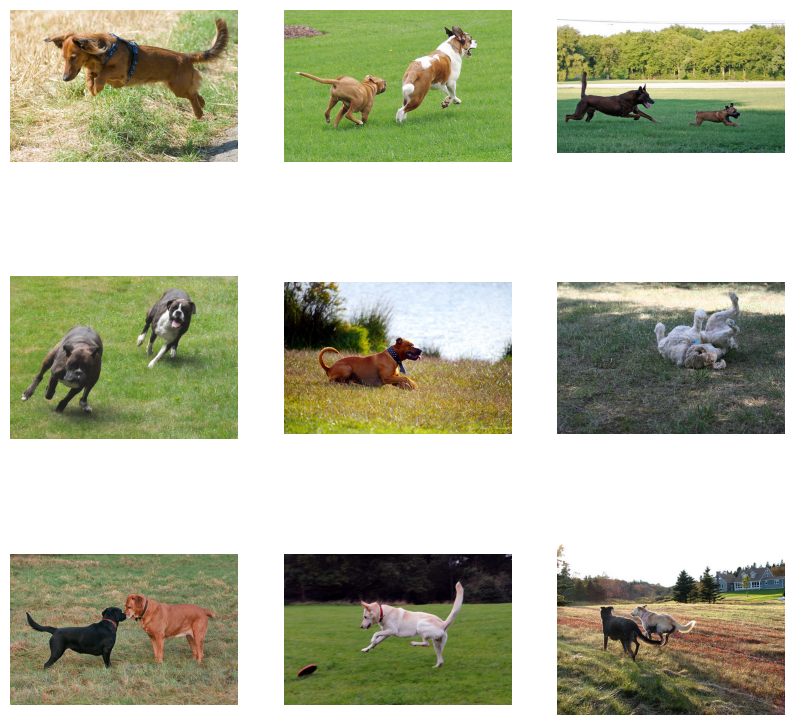

In [ ]:
find_matches(model,
             image_embeddings,
             query="dogs on the grass",
             image_filenames=valid_df['image'].values,
             n=9)

# Часть II. Prompt Engineering для ImageNet

In [ ]:
! pip install ftfy regex tqdm
! pip install git+https://github.com/openai/CLIP.git

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.1/53.1 kB 1.6 MB/s eta 0:00:00
  Cloning https://github.com/openai/CLIP.git to /tmp/pip-req-build-by1cjmlp
  Running command git clone --filter=blob:none --quiet https://github.com/openai/CLIP.git /tmp/pip-req-build-by1cjmlp
  Resolved https://github.com/openai/CLIP.git to commit a1d071733d7111c9c014f024669f959182114e33
  Preparing metadata (setup.py) ... done
  Created wheel for clip: filename=clip-1.0-py3-none-any.whl size=1369497 sha256=fedcac43e71558a1f558f8e6aa81765bcfbc5492e5cfcf69f041c1183680eca3
  Stored in directory: /tmp/pip-ephem-wheel-cache-_8jglf2j/wheels/da/2b/4c/d6691fa9597aac8bb85d2ac13b112deb897d5b50f5ad9a37e4
Successfully built clip


In [ ]:
import numpy as np
import torch
import clip
from tqdm.notebook import tqdm
from pkg_resources import packaging

print("Torch version:", torch.__version__)

Torch version: 2.0.1+cu118


## Загрузка модели

Загружаем и создаем экземпляр модели `CLIP`, используя только что установленный модуль клипа.

In [ ]:
clip.available_models()

['RN50',
 'RN101',
 'RN50x4',
 'RN50x16',
 'RN50x64',
 'ViT-B/32',
 'ViT-B/16',
 'ViT-L/14',
 'ViT-L/14@336px']

In [ ]:
model, preprocess = clip.load("ViT-B/32")

100%|███████████████████████████████████████| 338M/338M [00:06<00:00, 51.9MiB/s]


In [ ]:
input_resolution = model.visual.input_resolution
context_length = model.context_length
vocab_size = model.vocab_size

print("Model parameters:", f"{np.sum([int(np.prod(p.shape)) for p in model.parameters()]):,}")
print("Input resolution:", input_resolution)
print("Context length:", context_length)
print("Vocab size:", vocab_size)

Model parameters: 151,277,313
Input resolution: 224
Context length: 77
Vocab size: 49408


## Подготовка меток и промптов ImageNet

Следующая ячейка содержит 1000 меток для набора данных `ImageNet`, за которыми следуют текстовые шаблоны, которые мы будем использовать в качестве «быстрого проектирования».

In [ ]:
imagenet_classes = ["tench", "goldfish", "great white shark", "tiger shark", "hammerhead shark", "electric ray", "stingray", "rooster", "hen", "ostrich", "brambling", "goldfinch", "house finch", "junco", "indigo bunting", "American robin", "bulbul", "jay", "magpie", "chickadee", "American dipper", "kite (bird of prey)", "bald eagle", "vulture", "great grey owl", "fire salamander", "smooth newt", "newt", "spotted salamander", "axolotl", "American bullfrog", "tree frog", "tailed frog", "loggerhead sea turtle", "leatherback sea turtle", "mud turtle", "terrapin", "box turtle", "banded gecko", "green iguana", "Carolina anole", "desert grassland whiptail lizard", "agama", "frilled-necked lizard", "alligator lizard", "Gila monster", "European green lizard", "chameleon", "Komodo dragon", "Nile crocodile", "American alligator", "triceratops", "worm snake", "ring-necked snake", "eastern hog-nosed snake", "smooth green snake", "kingsnake", "garter snake", "water snake", "vine snake", "night snake", "boa constrictor", "African rock python", "Indian cobra", "green mamba", "sea snake", "Saharan horned viper", "eastern diamondback rattlesnake", "sidewinder rattlesnake", "trilobite", "harvestman", "scorpion", "yellow garden spider", "barn spider", "European garden spider", "southern black widow", "tarantula", "wolf spider", "tick", "centipede", "black grouse", "ptarmigan", "ruffed grouse", "prairie grouse", "peafowl", "quail", "partridge", "african grey parrot", "macaw", "sulphur-crested cockatoo", "lorikeet", "coucal", "bee eater", "hornbill", "hummingbird", "jacamar", "toucan", "duck", "red-breasted merganser", "goose", "black swan", "tusker", "echidna", "platypus", "wallaby", "koala", "wombat", "jellyfish", "sea anemone", "brain coral", "flatworm", "nematode", "conch", "snail", "slug", "sea slug", "chiton", "chambered nautilus", "Dungeness crab", "rock crab", "fiddler crab", "red king crab", "American lobster", "spiny lobster", "crayfish", "hermit crab", "isopod", "white stork", "black stork", "spoonbill", "flamingo", "little blue heron", "great egret", "bittern bird", "crane bird", "limpkin", "common gallinule", "American coot", "bustard", "ruddy turnstone", "dunlin", "common redshank", "dowitcher", "oystercatcher", "pelican", "king penguin", "albatross", "grey whale", "killer whale", "dugong", "sea lion", "Chihuahua", "Japanese Chin", "Maltese", "Pekingese", "Shih Tzu", "King Charles Spaniel", "Papillon", "toy terrier", "Rhodesian Ridgeback", "Afghan Hound", "Basset Hound", "Beagle", "Bloodhound", "Bluetick Coonhound", "Black and Tan Coonhound", "Treeing Walker Coonhound", "English foxhound", "Redbone Coonhound", "borzoi", "Irish Wolfhound", "Italian Greyhound", "Whippet", "Ibizan Hound", "Norwegian Elkhound", "Otterhound", "Saluki", "Scottish Deerhound", "Weimaraner", "Staffordshire Bull Terrier", "American Staffordshire Terrier", "Bedlington Terrier", "Border Terrier", "Kerry Blue Terrier", "Irish Terrier", "Norfolk Terrier", "Norwich Terrier", "Yorkshire Terrier", "Wire Fox Terrier", "Lakeland Terrier", "Sealyham Terrier", "Airedale Terrier", "Cairn Terrier", "Australian Terrier", "Dandie Dinmont Terrier", "Boston Terrier", "Miniature Schnauzer", "Giant Schnauzer", "Standard Schnauzer", "Scottish Terrier", "Tibetan Terrier", "Australian Silky Terrier", "Soft-coated Wheaten Terrier", "West Highland White Terrier", "Lhasa Apso", "Flat-Coated Retriever", "Curly-coated Retriever", "Golden Retriever", "Labrador Retriever", "Chesapeake Bay Retriever", "German Shorthaired Pointer", "Vizsla", "English Setter", "Irish Setter", "Gordon Setter", "Brittany dog", "Clumber Spaniel", "English Springer Spaniel", "Welsh Springer Spaniel", "Cocker Spaniel", "Sussex Spaniel", "Irish Water Spaniel", "Kuvasz", "Schipperke", "Groenendael dog", "Malinois", "Briard", "Australian Kelpie", "Komondor", "Old English Sheepdog", "Shetland Sheepdog", "collie", "Border Collie", "Bouvier des Flandres dog", "Rottweiler", "German Shepherd Dog", "Dobermann", "Miniature Pinscher", "Greater Swiss Mountain Dog", "Bernese Mountain Dog", "Appenzeller Sennenhund", "Entlebucher Sennenhund", "Boxer", "Bullmastiff", "Tibetan Mastiff", "French Bulldog", "Great Dane", "St. Bernard", "husky", "Alaskan Malamute", "Siberian Husky", "Dalmatian", "Affenpinscher", "Basenji", "pug", "Leonberger", "Newfoundland dog", "Great Pyrenees dog", "Samoyed", "Pomeranian", "Chow Chow", "Keeshond", "brussels griffon", "Pembroke Welsh Corgi", "Cardigan Welsh Corgi", "Toy Poodle", "Miniature Poodle", "Standard Poodle", "Mexican hairless dog (xoloitzcuintli)", "grey wolf", "Alaskan tundra wolf", "red wolf or maned wolf", "coyote", "dingo", "dhole", "African wild dog", "hyena", "red fox", "kit fox", "Arctic fox", "grey fox", "tabby cat", "tiger cat", "Persian cat", "Siamese cat", "Egyptian Mau", "cougar", "lynx", "leopard", "snow leopard", "jaguar", "lion", "tiger", "cheetah", "brown bear", "American black bear", "polar bear", "sloth bear", "mongoose", "meerkat", "tiger beetle", "ladybug", "ground beetle", "longhorn beetle", "leaf beetle", "dung beetle", "rhinoceros beetle", "weevil", "fly", "bee", "ant", "grasshopper", "cricket insect", "stick insect", "cockroach", "praying mantis", "cicada", "leafhopper", "lacewing", "dragonfly", "damselfly", "red admiral butterfly", "ringlet butterfly", "monarch butterfly", "small white butterfly", "sulphur butterfly", "gossamer-winged butterfly", "starfish", "sea urchin", "sea cucumber", "cottontail rabbit", "hare", "Angora rabbit", "hamster", "porcupine", "fox squirrel", "marmot", "beaver", "guinea pig", "common sorrel horse", "zebra", "pig", "wild boar", "warthog", "hippopotamus", "ox", "water buffalo", "bison", "ram (adult male sheep)", "bighorn sheep", "Alpine ibex", "hartebeest", "impala (antelope)", "gazelle", "arabian camel", "llama", "weasel", "mink", "European polecat", "black-footed ferret", "otter", "skunk", "badger", "armadillo", "three-toed sloth", "orangutan", "gorilla", "chimpanzee", "gibbon", "siamang", "guenon", "patas monkey", "baboon", "macaque", "langur", "black-and-white colobus", "proboscis monkey", "marmoset", "white-headed capuchin", "howler monkey", "titi monkey", "Geoffroy's spider monkey", "common squirrel monkey", "ring-tailed lemur", "indri", "Asian elephant", "African bush elephant", "red panda", "giant panda", "snoek fish", "eel", "silver salmon", "rock beauty fish", "clownfish", "sturgeon", "gar fish", "lionfish", "pufferfish", "abacus", "abaya", "academic gown", "accordion", "acoustic guitar", "aircraft carrier", "airliner", "airship", "altar", "ambulance", "amphibious vehicle", "analog clock", "apiary", "apron", "trash can", "assault rifle", "backpack", "bakery", "balance beam", "balloon", "ballpoint pen", "Band-Aid", "banjo", "baluster / handrail", "barbell", "barber chair", "barbershop", "barn", "barometer", "barrel", "wheelbarrow", "baseball", "basketball", "bassinet", "bassoon", "swimming cap", "bath towel", "bathtub", "station wagon", "lighthouse", "beaker", "military hat (bearskin or shako)", "beer bottle", "beer glass", "bell tower", "baby bib", "tandem bicycle", "bikini", "ring binder", "binoculars", "birdhouse", "boathouse", "bobsleigh", "bolo tie", "poke bonnet", "bookcase", "bookstore", "bottle cap", "hunting bow", "bow tie", "brass memorial plaque", "bra", "breakwater", "breastplate", "broom", "bucket", "buckle", "bulletproof vest", "high-speed train", "butcher shop", "taxicab", "cauldron", "candle", "cannon", "canoe", "can opener", "cardigan", "car mirror", "carousel", "tool kit", "cardboard box / carton", "car wheel", "automated teller machine", "cassette", "cassette player", "castle", "catamaran", "CD player", "cello", "mobile phone", "chain", "chain-link fence", "chain mail", "chainsaw", "storage chest", "chiffonier", "bell or wind chime", "china cabinet", "Christmas stocking", "church", "movie theater", "cleaver", "cliff dwelling", "cloak", "clogs", "cocktail shaker", "coffee mug", "coffeemaker", "spiral or coil", "combination lock", "computer keyboard", "candy store", "container ship", "convertible", "corkscrew", "cornet", "cowboy boot", "cowboy hat", "cradle", "construction crane", "crash helmet", "crate", "infant bed", "Crock Pot", "croquet ball", "crutch", "cuirass", "dam", "desk", "desktop computer", "rotary dial telephone", "diaper", "digital clock", "digital watch", "dining table", "dishcloth", "dishwasher", "disc brake", "dock", "dog sled", "dome", "doormat", "drilling rig", "drum", "drumstick", "dumbbell", "Dutch oven", "electric fan", "electric guitar", "electric locomotive", "entertainment center", "envelope", "espresso machine", "face powder", "feather boa", "filing cabinet", "fireboat", "fire truck", "fire screen", "flagpole", "flute", "folding chair", "football helmet", "forklift", "fountain", "fountain pen", "four-poster bed", "freight car", "French horn", "frying pan", "fur coat", "garbage truck", "gas mask or respirator", "gas pump", "goblet", "go-kart", "golf ball", "golf cart", "gondola", "gong", "gown", "grand piano", "greenhouse", "radiator grille", "grocery store", "guillotine", "hair clip", "hair spray", "half-track", "hammer", "hamper", "hair dryer", "hand-held computer", "handkerchief", "hard disk drive", "harmonica", "harp", "combine harvester", "hatchet", "holster", "home theater", "honeycomb", "hook", "hoop skirt", "gymnastic horizontal bar", "horse-drawn vehicle", "hourglass", "iPod", "clothes iron", "carved pumpkin", "jeans", "jeep", "T-shirt", "jigsaw puzzle", "rickshaw", "joystick", "kimono", "knee pad", "knot", "lab coat", "ladle", "lampshade", "laptop computer", "lawn mower", "lens cap", "letter opener", "library", "lifeboat", "lighter", "limousine", "ocean liner", "lipstick", "slip-on shoe", "lotion", "music speaker", "loupe magnifying glass", "sawmill", "magnetic compass", "messenger bag", "mailbox", "tights", "one-piece bathing suit", "manhole cover", "maraca", "marimba", "mask", "matchstick", "maypole", "maze", "measuring cup", "medicine cabinet", "megalith", "microphone", "microwave oven", "military uniform", "milk can", "minibus", "miniskirt", "minivan", "missile", "mitten", "mixing bowl", "mobile home", "ford model t", "modem", "monastery", "monitor", "moped", "mortar and pestle", "graduation cap", "mosque", "mosquito net", "vespa", "mountain bike", "tent", "computer mouse", "mousetrap", "moving van", "muzzle", "metal nail", "neck brace", "necklace", "baby pacifier", "notebook computer", "obelisk", "oboe", "ocarina", "odometer", "oil filter", "pipe organ", "oscilloscope", "overskirt", "bullock cart", "oxygen mask", "product packet / packaging", "paddle", "paddle wheel", "padlock", "paintbrush", "pajamas", "palace", "pan flute", "paper towel", "parachute", "parallel bars", "park bench", "parking meter", "railroad car", "patio", "payphone", "pedestal", "pencil case", "pencil sharpener", "perfume", "Petri dish", "photocopier", "plectrum", "Pickelhaube", "picket fence", "pickup truck", "pier", "piggy bank", "pill bottle", "pillow", "ping-pong ball", "pinwheel", "pirate ship", "drink pitcher", "block plane", "planetarium", "plastic bag", "plate rack", "farm plow", "plunger", "Polaroid camera", "pole", "police van", "poncho", "pool table", "soda bottle", "plant pot", "potter's wheel", "power drill", "prayer rug", "printer", "prison", "missile", "projector", "hockey puck", "punching bag", "purse", "quill", "quilt", "race car", "racket", "radiator", "radio", "radio telescope", "rain barrel", "recreational vehicle", "fishing casting reel", "reflex camera", "refrigerator", "remote control", "restaurant", "revolver", "rifle", "rocking chair", "rotisserie", "eraser", "rugby ball", "ruler measuring stick", "sneaker", "safe", "safety pin", "salt shaker", "sandal", "sarong", "saxophone", "scabbard", "weighing scale", "school bus", "schooner", "scoreboard", "CRT monitor", "screw", "screwdriver", "seat belt", "sewing machine", "shield", "shoe store", "shoji screen / room divider", "shopping basket", "shopping cart", "shovel", "shower cap", "shower curtain", "ski", "balaclava ski mask", "sleeping bag", "slide rule", "sliding door", "slot machine", "snorkel", "snowmobile", "snowplow", "soap dispenser", "soccer ball", "sock", "solar thermal collector", "sombrero", "soup bowl", "keyboard space bar", "space heater", "space shuttle", "spatula", "motorboat", "spider web", "spindle", "sports car", "spotlight", "stage", "steam locomotive", "through arch bridge", "steel drum", "stethoscope", "scarf", "stone wall", "stopwatch", "stove", "strainer", "tram", "stretcher", "couch", "stupa", "submarine", "suit", "sundial", "sunglasses", "sunglasses", "sunscreen", "suspension bridge", "mop", "sweatshirt", "swim trunks / shorts", "swing", "electrical switch", "syringe", "table lamp", "tank", "tape player", "teapot", "teddy bear", "television", "tennis ball", "thatched roof", "front curtain", "thimble", "threshing machine", "throne", "tile roof", "toaster", "tobacco shop", "toilet seat", "torch", "totem pole", "tow truck", "toy store", "tractor", "semi-trailer truck", "tray", "trench coat", "tricycle", "trimaran", "tripod", "triumphal arch", "trolleybus", "trombone", "hot tub", "turnstile", "typewriter keyboard", "umbrella", "unicycle", "upright piano", "vacuum cleaner", "vase", "vaulted or arched ceiling", "velvet fabric", "vending machine", "vestment", "viaduct", "violin", "volleyball", "waffle iron", "wall clock", "wallet", "wardrobe", "military aircraft", "sink", "washing machine", "water bottle", "water jug", "water tower", "whiskey jug", "whistle", "hair wig", "window screen", "window shade", "Windsor tie", "wine bottle", "airplane wing", "wok", "wooden spoon", "wool", "split-rail fence", "shipwreck", "sailboat", "yurt", "website", "comic book", "crossword", "traffic or street sign", "traffic light", "dust jacket", "menu", "plate", "guacamole", "consomme", "hot pot", "trifle", "ice cream", "popsicle", "baguette", "bagel", "pretzel", "cheeseburger", "hot dog", "mashed potatoes", "cabbage", "broccoli", "cauliflower", "zucchini", "spaghetti squash", "acorn squash", "butternut squash", "cucumber", "artichoke", "bell pepper", "cardoon", "mushroom", "Granny Smith apple", "strawberry", "orange", "lemon", "fig", "pineapple", "banana", "jackfruit", "cherimoya (custard apple)", "pomegranate", "hay", "carbonara", "chocolate syrup", "dough", "meatloaf", "pizza", "pot pie", "burrito", "red wine", "espresso", "tea cup", "eggnog", "mountain", "bubble", "cliff", "coral reef", "geyser", "lakeshore", "promontory", "sandbar", "beach", "valley", "volcano", "baseball player", "bridegroom", "scuba diver", "rapeseed", "daisy", "yellow lady's slipper", "corn", "acorn", "rose hip", "horse chestnut seed", "coral fungus", "agaric", "gyromitra", "stinkhorn mushroom", "earth star fungus", "hen of the woods mushroom", "bolete", "corn cob", "toilet paper"]



Подмножество этих имен классов изменено из имен классов `ImageNet` по умолчанию, полученных из `imagenet-simple-labels` Аниша Атали.

Эти изменения были внесены методом проб и ошибок и сконцентрированы на классах с наименьшими показателями согласно точности `top_1` и `top_5` в обучающем датасете `ImageNet` для моделей `RN50`, `RN101` и `RN50x4`. Эти настройки улучшают `top_1` на 1,5% в ViT-B/32 по сравнению с использованием имен классов по умолчанию.

Некоторые примеры, выходящие за рамки проблемы кран/кран -> строительный кран/птичий кран, упомянутой в разделе 3.1.4 документа, включают:

* CLIP интерпретирует слово «гвоздь[nail]» как «ноготь[nail]», поэтому мы изменили
название на «металлический гвоздь(metal nail)».
* Класс воздушного змея[kite] ImageNet относится к хищной птице, а не к летающей игрушке, поэтому мы заменили «воздушный змей[kite]» на «воздушный змей (хищная птица) [kite (bird of prey)]».
* Класс ImageNet для красного волка, кажется, включает в себя множество неправильно маркированных гривистых волков, поэтому мы изменили «красный волк» на «красный волк или гривистый волк».

In [ ]:
imagenet_templates = [
    'a bad photo of a {}.',
    'a photo of many {}.',
    'a sculpture of a {}.',
    'a photo of the hard to see {}.',
    'a low resolution photo of the {}.',
    'a rendering of a {}.',
    'graffiti of a {}.',
    'a bad photo of the {}.',
    'a cropped photo of the {}.',
    'a tattoo of a {}.',
    'the embroidered {}.',
    'a photo of a hard to see {}.',
    'a bright photo of a {}.',
    'a photo of a clean {}.',
    'a photo of a dirty {}.',
    'a dark photo of the {}.',
    'a drawing of a {}.',
    'a photo of my {}.',
    'the plastic {}.',
    'a photo of the cool {}.',
    'a close-up photo of a {}.',
    'a black and white photo of the {}.',
    'a painting of the {}.',
    'a painting of a {}.',
    'a pixelated photo of the {}.',
    'a sculpture of the {}.',
    'a bright photo of the {}.',
    'a cropped photo of a {}.',
    'a plastic {}.',
    'a photo of the dirty {}.',
    'a jpeg corrupted photo of a {}.',
    'a blurry photo of the {}.',
    'a photo of the {}.',
    'a good photo of the {}.',
    'a rendering of the {}.',
    'a {} in a video game.',
    'a photo of one {}.',
    'a doodle of a {}.',
    'a close-up photo of the {}.',
    'a photo of a {}.',
    'the origami {}.',
    'the {} in a video game.',
    'a sketch of a {}.',
    'a doodle of the {}.',
    'a origami {}.',
    'a low resolution photo of a {}.',
    'the toy {}.',
    'a rendition of the {}.',
    'a photo of the clean {}.',
    'a photo of a large {}.',
    'a rendition of a {}.',
    'a photo of a nice {}.',
    'a photo of a weird {}.',
    'a blurry photo of a {}.',
    'a cartoon {}.',
    'art of a {}.',
    'a sketch of the {}.',
    'a embroidered {}.',
    'a pixelated photo of a {}.',
    'itap of the {}.',
    'a jpeg corrupted photo of the {}.',
    'a good photo of a {}.',
    'a plushie {}.',
    'a photo of the nice {}.',
    'a photo of the small {}.',
    'a photo of the weird {}.',
    'the cartoon {}.',
    'art of the {}.',
    'a drawing of the {}.',
    'a photo of the large {}.',
    'a black and white photo of a {}.',
    'the plushie {}.',
    'a dark photo of a {}.',
    'itap of a {}.',
    'graffiti of the {}.',
    'a toy {}.',
    'itap of my {}.',
    'a photo of a cool {}.',
    'a photo of a small {}.',
    'a tattoo of the {}.',
]

print(f"{len(imagenet_classes)} classes, {len(imagenet_templates)} templates")

1000 classes, 80 templates


Для шаблонов использовался аналогичный метод проб и ошибок, основанный на интуиции и на основе обучающего набора ImageNet. Этот список довольно бессистемен, он постепенно составлялся/расширялся и пересматривался/корректировался каждые несколько месяцев. Удивительным/странным было то, что добавление шаблонов, предназначенных для повышения производительности ImageNet-R (с указанием различных возможных представлений объекта), также улучшило стандартную точность ImageNet.

После того, как 80 шаблонов были «заблокированы» для статьи, был проведен последовательный прямой отбор по списку из 80 шаблонов. Поиск завершился после того, как были собраны 7 шаблонов и выбраны в порядке ниже.

1. itap of a {}.
2. a bad photo of the {}.
3. a origami {}.
4. a photo of the large {}.
5. a {} in a video game.
6. art of the {}.
7. a photo of the small {}.

Порассуждая, мы думаем, что интересно увидеть разные масштабы (большой и маленький), сложный вид (плохая фотография) и «абстрактные» версии (оригами, видеоигры, искусство) - все это было выбрано, но мы не изучали это во всех подробностях. Это подмножество работает немного лучше, чем полный ансамбль из 80, описанный в статье, особенно для моделей меньшего размера.

## Загрузка изображений

Наборы данных ILSVRC2012 больше не доступны для публичного скачивания. Вместо этого мы загружаем набор данных ImageNet-V2 от Recht et al..

Если у вас загружен набор данных ImageNet, вы можете заменить его официальным загрузчиком torchvision, например:
```
images = torchvision.datasets.ImageNet("path/to/imagenet", split='val', transform=preprocess)
```

In [ ]:
! pip install git+https://github.com/modestyachts/ImageNetV2_pytorch

from imagenetv2_pytorch import ImageNetV2Dataset

images = ImageNetV2Dataset(transform=preprocess)
loader = torch.utils.data.DataLoader(images, batch_size=32, num_workers=2)

  Cloning https://github.com/modestyachts/ImageNetV2_pytorch to /tmp/pip-req-build-0t3_9xyd
  Running command git clone --filter=blob:none --quiet https://github.com/modestyachts/ImageNetV2_pytorch /tmp/pip-req-build-0t3_9xyd
  Resolved https://github.com/modestyachts/ImageNetV2_pytorch to commit 14d4456c39fe7f02a665544dd9fc37c1a5f8b635
  Preparing metadata (setup.py) ... done
  Created wheel for imagenetv2-pytorch: filename=imagenetv2_pytorch-0.1-py3-none-any.whl size=2660 sha256=6799a6b620c156e80e20293aa3aa3ea4d04037a5ce415ec662c3df441fd0d1dc
  Stored in directory: /tmp/pip-ephem-wheel-cache-n0chcphy/wheels/ea/e3/2d/38c8d17086a0ea5890dc0d4796db505e41323d2d9800b56fa7
Successfully built imagenetv2-pytorch
Dataset matched-frequency not found on disk, downloading....


100%|██████████| 1.26G/1.26G [00:20<00:00, 60.6MiB/s]


Extracting....


## Создание весов zero-shot классификатора

In [ ]:
def zeroshot_classifier(classnames, templates):
    with torch.no_grad():
        zeroshot_weights = []
        for classname in tqdm(classnames):
            texts = [template.format(classname) for template in templates] #format with class
            texts = clip.tokenize(texts).cuda() #tokenize
            class_embeddings = model.encode_text(texts) #embed with text encoder
            class_embeddings /= class_embeddings.norm(dim=-1, keepdim=True)
            class_embedding = class_embeddings.mean(dim=0)
            class_embedding /= class_embedding.norm()
            zeroshot_weights.append(class_embedding)
        zeroshot_weights = torch.stack(zeroshot_weights, dim=1).cuda()
    return zeroshot_weights


zeroshot_weights = zeroshot_classifier(imagenet_classes, imagenet_templates)

  0%|          | 0/1000 [00:00<?, ?it/s]

## Zero-shot предсказание

In [ ]:
def accuracy(output, target, topk=(1,)):
    pred = output.topk(max(topk), 1, True, True)[1].t()
    correct = pred.eq(target.view(1, -1).expand_as(pred))
    return [float(correct[:k].reshape(-1).float().sum(0, keepdim=True).cpu().numpy()) for k in topk]

In [ ]:
with torch.no_grad():
    top1, top5, n = 0., 0., 0.
    for i, (images, target) in enumerate(tqdm(loader)):
        images = images.cuda()
        target = target.cuda()

        # predict
        image_features = model.encode_image(images)
        image_features /= image_features.norm(dim=-1, keepdim=True)
        logits = 100. * image_features @ zeroshot_weights

        # measure accuracy
        acc1, acc5 = accuracy(logits, target, topk=(1, 5))
        top1 += acc1
        top5 += acc5
        n += images.size(0)

top1 = (top1 / n) * 100
top5 = (top5 / n) * 100

print(f"Top-1 accuracy: {top1:.2f}")
print(f"Top-5 accuracy: {top5:.2f}")

  0%|          | 0/313 [00:00<?, ?it/s]

Top-1 accuracy: 55.93
Top-5 accuracy: 83.41


### Выводы


В данном занятии мы разобрали то как устроена архитектура CLIP, как она предобучалась и как её можно использовать для решения задач классификации без обучения.